In [6]:
import pygame
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

error_sprite = "data/wfc_tiles/error.png"

sprites = {
    0: "data/wfc_tiles/0.png",
    1: "data/wfc_tiles/1.png",
    2: "data/wfc_tiles/2.png",
    3: "data/wfc_tiles/3.png"
}

sprites_rot = [(sprites[x], r) for r in [0,1,2,3] for x in sprites]

sprite_size = 16

In [8]:
rules = np.array([
    [ # 0
        [ # top
            [1,0,0,0], # a
            [1,1,1,0], # b
            [1,1,0,0], # c
            [1,0,0,0]  # d
        ],
        [
            [1,0,0,0],
            [1,0,0,0],
            [1,1,1,0],
            [1,1,0,0]
        ],
        [
            [1,1,0,0],
            [1,0,0,0],
            [1,0,0,0],
            [1,1,1,0]
        ],
        [
            [1,1,1,0],
            [1,1,0,0],
            [1,0,0,0],
            [1,0,0,0]
        ]
    ],
    [
        [
            [1,0,0,0],
            [1,0,0,0],
            [1,0,0,0],
            [1,0,0,0]
        ],
        [
            [1,0,0,0],
            [1,0,0,0],
            [1,0,0,0],
            [1,0,0,0]
        ],
        [
            [0,0,1,1],
            [0,1,0,0],
            [0,0,0,0],
            [0,0,0,0]
        ],
        [
            [0,0,0,1],
            [0,0,0,0],
            [0,0,0,0],
            [0,1,1,0]
        ]
    ],
    [
        [
            [0,1,1,0],
            [0,0,0,1],
            [0,0,0,0],
            [0,0,0,0]
        ],
        [
            [1,0,0,0],
            [1,0,0,0],
            [1,0,0,0],
            [1,0,0,0]
        ],
        [
            [0,0,1,1],
            [0,1,0,0],
            [0,0,0,0],
            [0,0,0,0]
        ],
        [
            [0,0,0,0],
            [0,0,0,0],
            [0,0,1,1],
            [0,0,0,1]
        ]
    ],
    [
        [
            [0,1,1,0],
            [0,0,0,1],
            [0,0,0,0],
            [0,0,0,0]
        ],
        [
            [0,1,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,1,1]
        ],
        [
            [0,0,0,0],
            [0,0,1,1],
            [0,0,0,1],
            [0,0,0,0]
        ],
        [
            [0,0,0,0],
            [0,0,0,0],
            [0,0,1,1],
            [0,0,0,1]
        ]
    ]
])
rules.shape

(4, 4, 4, 4)

In [9]:
def rotRules(i):
    return np.roll(rules,i,axis=(1,2))

In [10]:
size = 40
field = [[random.randint(0,len(sprites_rot)-1) for x in range(size)] for y in range(size)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


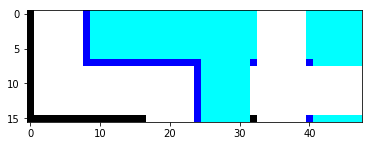

In [11]:
img = pygame.image.load("data/wfc_tiles/1.png")
img_data = np.array(pygame.surfarray.array3d(img), np.float)
img_data1 = pygame.surfarray.array3d(pygame.transform.average_surfaces([img]))
plt.imshow(np.hstack([img_data,img_data1]))

img2 = pygame.image.load("data/wfc_tiles/3.png")
img2_data = np.array(pygame.surfarray.array3d(img2), np.float)

img_avg = np.array(np.mean( np.array([ img_data, img2_data ]), axis=0 ), np.uint8)

plt.imshow(np.hstack([img_data,img2_data, img_avg]))

(16, 16, 3)
[70. 70. 32.]
[  0. 148. 114.]
[ 35 109  73]


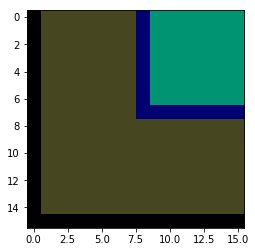

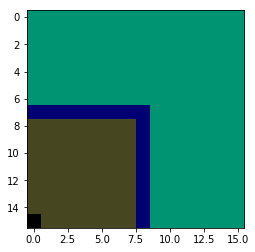

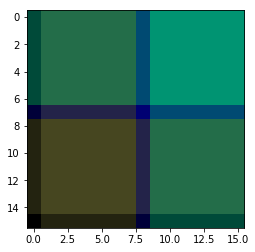

In [12]:
plt.imshow(np.array(img_data, np.uint8))
print(img_data.shape)
plt.figure()
plt.imshow(np.array(img2_data, np.uint8))
print(img_data[5,5,:])
print(img2_data[5,5,:])
print(img_avg[5,5,:])
plt.figure()
plt.imshow(img_avg)

In [13]:
def meanSurface(sfcs):
    arrs = [np.array(pygame.surfarray.array3d(s), np.float) for s in sfcs]
    avg_s = np.array(np.mean( np.array(arrs), axis=0 ), np.uint8)
    return pygame.surfarray.make_surface(avg_s)

In [14]:
class SimpleSprite(pygame.sprite.Sprite):
    """ The class is the simple sprite. """
 
    def __init__(self, x, y, code):
        """Constructor function"""
        # Call the parent's constructor
        super().__init__()
 
        # Set height, width
        #self.image = pygame.Surface([15, 15])
        self.image = pygame.transform.rotate(pygame.image.load(sprites_rot[code][0]), -sprites_rot[code][1]*90)
        #self.image.fill(BLACK)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.x = x
        self.rect.y = y
        self.code = code
    
    def setCode(self, code):
        self.code = code
        self.image = pygame.transform.rotate(pygame.image.load(sprites_rot[code][0]), -sprites_rot[code][1]*90)
        
class SchrodingerSprite(pygame.sprite.Sprite):
    """ The class is the simple sprite. """
 
    def __init__(self, x, y, codes):
        """Constructor function"""
        # Call the parent's constructor
        super().__init__()
 
        # Set height, width
        #self.image = pygame.Surface([15, 15])
        if len(codes)>0:
            self.image = meanSurface([pygame.transform.rotate(pygame.image.load(sprites_rot[code][0]), -sprites_rot[code][1]*90) for code in codes])
        else:
            self.image = pygame.image.load(error_sprite)
        #self.image.fill(BLACK)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.x = x
        self.rect.y = y
        self.codes = codes
    
    def setCode(self, codes):
        self.codes = codes
        if len(codes)>0:
            self.image = meanSurface([pygame.transform.rotate(pygame.image.load(sprites_rot[code][0]), -sprites_rot[code][1]*90) for code in codes])
        else:
            self.image = pygame.image.load(error_sprite)

In [17]:
# Call this function so the Pygame library can initialize itself
pygame.init()

# Create an 800x600 sized screen
screen = pygame.display.set_mode([size*sprite_size, size*sprite_size])
 
# Set the title of the window
pygame.display.set_caption("WFC Test")
 
# Create the player paddle object
#player = Player(0, 0)
all_sprites_list = pygame.sprite.Group()
my_sprites_list = []

fld = field.copy()
for i in range(size):
    for j in range(size):
        #spr = SimpleSprite(i*sprite_size,j*sprite_size,fld[j][i])
        spr = SchrodingerSprite(i*sprite_size,j*sprite_size,set(range(len(sprites_rot))))
        all_sprites_list.add(spr)
        my_sprites_list.append(spr)

def regenerate():
    for x in range(size): 
        for y in range(size):
            my_sprites_list[x+y*size].setCode(random.randint(0,len(sprites_rot)-1))
        screen.fill(WHITE)
        all_sprites_list.draw(screen)
        pygame.display.flip()

def regenerate_sch():
    for x in range(size): 
        for y in range(size):
            my_sprites_list[x+y*size].setCode(set([random.randint(0,len(sprites_rot)-1) for x in range(5)]))
        screen.fill(WHITE)
        all_sprites_list.draw(screen)
        pygame.display.flip()

def regenerate_sample():
    for x in range(len(sprites)): 
        for y in range(len(sprites)):
            my_sprites_list[x+y*size].setCode(set([x+y*len(sprites)]))
        screen.fill(WHITE)
        all_sprites_list.draw(screen)
        pygame.display.flip()

def regenerate_init():
    for x in range(size): 
        for y in range(size):
            my_sprites_list[x+y*size].setCode(set(range(len(sprites_rot))))
        screen.fill(WHITE)
        all_sprites_list.draw(screen)
        pygame.display.flip()

def applyRules(Cc, Cx, d, debug=False):
    if debug:
        for c in Cc:
            print("Possible candidates for " + str(c) + " are:", np.where(rotRules(c//len(sprites))[c%len(sprites),d].flatten())[0].tolist() )
    tcs = [set(np.where(rotRules(c//len(sprites))[c%len(sprites),d].flatten())[0].tolist()) for c in Cc]
    if len(tcs)>0:
        tc = set.union(*tcs)
    else:
        if debug:
            print("CONFLICT")
        tc = set(range(len(sprites_rot)))
    if debug:
        print("Resulting candidates", tc)
        print("Intersect with", Cx)
    return set.intersection(Cx,tc)

def collapse(x, y, debug=False):
    if debug:
        print("Called collapse with args",x,y)
    C = my_sprites_list[x+y*size]
    propagation = []
    
    Ct = my_sprites_list[((x-1)%size+y*size)%len(my_sprites_list)]
    if debug:
        print("Top before collapse", Ct.codes)
    Ctc = applyRules(C.codes, Ct.codes, 0, debug)
    if debug:
        print("Final top states", Ctc)
    if Ct.codes != Ctc:
        propagation.append(((x-1)%size,y))
    Ct.setCode(Ctc)

    Cr = my_sprites_list[(x+((y+1)%size)*size)%len(my_sprites_list)]
    if debug:
        print("Right before collapse", Cr.codes)
    Crc = applyRules(C.codes, Cr.codes, 1, debug)
    if debug:
        print("Final right states", Crc)
    if Cr.codes != Crc:
        propagation.append((x,(y+1)%size))
    Cr.setCode(Crc)

    Cb = my_sprites_list[((x+1)%size+y*size)%len(my_sprites_list)]
    if debug:
        print("Bottom before collapse", Cb.codes)
    Cbc = applyRules(C.codes, Cb.codes, 2, debug)
    if debug:
        print("Final bottom states", Cbc)
    if Cb.codes != Cbc:
        propagation.append(((x+1)%size,y))
    Cb.setCode(Cbc)

    Cl = my_sprites_list[(x+((y-1)%size)*size)%len(my_sprites_list)]
    if debug:
        print("Bottom before collapse", Cl.codes)
    Clc = applyRules(C.codes, Cl.codes, 3, debug)
    if debug:
        print("Final bottom states", Clc)
    if Cl.codes != Clc:
        propagation.append((x,(y-1)%size))
    Cl.setCode(Clc)
    
    if debug:
        print("Step down in recursion")
        print("Recursive propagation :", propagation)
    for z in propagation:
        collapse(z[0], z[1], debug)
    if debug:
        print("Step out of recursion")

    
def fullCollapse(debug=False):
    entropy = np.array([len(C.codes) for C in my_sprites_list])
    while entropy.max() > 1:
        if debug:
            print("Maximum entropy:",entropy.max())
        emin = entropy[entropy>1].min()
        if debug:
            print("Entropy minimum:", emin)
        pos = np.where(entropy==emin)[0][0]
        if debug:
            print("Collapsing ", pos, "(",pos%size,",",pos//size,")")
        C = my_sprites_list[pos]
        C.setCode(set([list(C.codes)[random.randint(0,len(list(C.codes))-1)]]))
        collapse(pos%size,pos//size, debug)
        screen.fill(WHITE)
        all_sprites_list.draw(screen)
        pygame.display.flip()
        entropy = np.array([len(C.codes) for C in my_sprites_list])

    
#all_sprites_list.add(player)
done = False

clock = pygame.time.Clock()

code_trace = []

while not done:
 
    for event in pygame.event.get():
        try:
            if event.type == pygame.QUIT:
                done = True

            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_g:
                    regenerate_sch()
                elif event.key == pygame.K_s:
                    regenerate_sample()
                elif event.key == pygame.K_r:
                    regenerate_init()
                elif event.key == pygame.K_f:
                    fullCollapse()
                else:
                    done = True
            
            elif event.type == pygame.MOUSEBUTTONUP:
                pos = pygame.mouse.get_pos()
                y = pos[0] // sprite_size
                x = pos[1] // sprite_size
                print("------------------------------")
                print("coords: " + str([y,x]))
                C = my_sprites_list[x+y*size]
                print("Collapsing from", C.codes)
                if event.button==1:
                    C.setCode(set([list(C.codes)[random.randint(0,len(list(C.codes))-1)]]))
                    print("Collapse result:", C.codes)
                    code_trace = code_trace + list(C.codes)
                    collapse(x,y)
                elif 0 in C.codes:
                    C.setCode(set([0]))
                    print("Collapse result:", C.codes)
                    code_trace = code_trace + list(C.codes)
                    collapse(x,y)
                else:
                    print("Blank collapse impossible")
                

    # -- Draw everything

            # Clear screen
            screen.fill(WHITE)
            # Draw sprites
            all_sprites_list.draw(screen)
            # Flip screen
            pygame.display.flip()    
        except Exception as e:
            print("error: " + str(e))
            break
 
    # Pause
    clock.tick(40)
    

pygame.quit()

------------------------------
coords: [14, 15]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [17, 16]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [15, 15]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [16, 14]
Collapsing from {0, 4, 5, 6, 8, 9, 10, 11, 12, 13}
Collapse result: {0}
------------------------------
coords: [17, 15]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [18, 13]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [19, 12]
Collapsing from {0, 4, 5, 6, 8, 9, 10, 11, 12, 13}
Collapse result: {0}
------------------------------
coords: [20, 10]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse 

------------------------------
coords: [18, 26]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [15, 25]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [29, 19]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [31, 20]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [32, 21]
Collapsing from {0, 1, 4, 8, 9, 10, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [33, 22]
Collapsing from {0, 1, 4, 8, 9, 10, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [35, 23]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [37, 26]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
-

------------------------------
coords: [7, 4]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [8, 4]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [9, 4]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [10, 4]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [11, 4]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [12, 4]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [14, 4]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [17, 4]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [16, 4]
Collapsing from {0, 1, 2

------------------------------
coords: [37, 13]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [39, 13]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [23, 14]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [23, 15]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [23, 17]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [23, 19]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [23, 24]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [23, 26]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1

------------------------------
coords: [36, 39]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [34, 39]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [32, 39]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [30, 39]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [29, 39]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [26, 39]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [28, 39]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [25, 39]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [0, 27]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [0, 29]
Collapsin

------------------------------
coords: [16, 8]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [20, 7]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [21, 7]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [17, 8]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [19, 7]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [22, 7]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [25, 7]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [26, 7]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [24, 7]
Collapsing from {0, 1, 2, 4, 5, 8

------------------------------
coords: [6, 21]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [7, 19]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [20, 0]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [20, 0]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [20, 2]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [20, 2]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [20, 4]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [20, 5]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [20, 8]
Collapsing 

Collapse result: {0}
------------------------------
coords: [9, 25]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [7, 26]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [8, 27]
Collapsing from {0, 1, 4, 8, 9, 10, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [10, 27]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [10, 28]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [13, 29]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [12, 28]
Collapsing from {0, 1, 2, 4, 5, 6, 7, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [10, 27]
Collapsing from {0}
Collapse result: {0}
---------------

------------------------------
coords: [24, 12]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [24, 13]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [24, 12]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [21, 11]
Collapsing from {0, 1, 4, 8, 9, 10, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [22, 11]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [22, 11]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [23, 13]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [21, 12]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [22, 11]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [27

------------------------------
coords: [30, 11]
Collapsing from {0, 8, 4, 12, 5}
Collapse result: {0}
------------------------------
coords: [32, 9]
Collapsing from {0, 1, 2, 4, 5, 6, 7, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [34, 8]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [35, 7]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [37, 6]
Collapsing from {0, 8, 4, 12, 5}
Collapse result: {0}
------------------------------
coords: [38, 5]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [39, 4]
Collapsing from {0, 4, 5, 6, 8, 9, 10, 11, 12, 13}
Collapse result: {0}
------------------------------
coords: [39, 4]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [30, 28]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
-------------

------------------------------
coords: [9, 30]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [10, 29]
Collapsing from {0, 8, 13, 12, 4}
Collapse result: {0}
------------------------------
coords: [12, 29]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [14, 30]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [13, 30]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [10, 30]
Collapsing from {0, 8, 13, 12, 4}
Collapse result: {0}
------------------------------
coords: [10, 30]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [13, 31]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [14, 31]
Collapsing from {0, 8, 12, 4, 13}
Collapse result: {0}
------------------------------
coords: [16, 31]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
---------

------------------------------
coords: [18, 15]
Collapsing from {10, 11, 13}
Collapse result: {13}
------------------------------
coords: [18, 14]
Collapsing from {0, 8, 4, 12}
Collapse result: {0}
------------------------------
coords: [20, 14]
Collapsing from {0, 1, 2, 3, 4, 7, 8, 9, 10, 12, 13, 14, 15}
Collapse result: {1}
------------------------------
coords: [20, 16]
Collapsing from {2, 3, 5, 6, 7, 11}
Collapse result: {11}
------------------------------
coords: [21, 17]
Collapsing from {2, 3, 5, 6, 7, 11}
Collapse result: {11}
------------------------------
coords: [22, 19]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Collapse result: {4}
------------------------------
coords: [23, 17]
Collapsing from {0, 1, 4, 5, 6, 8, 12, 14}
Collapse result: {8}
------------------------------
coords: [23, 15]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [23, 14]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
-------------

------------------------------
coords: [17, 2]
Collapsing from {0, 8, 5, 12, 4}
Collapse result: {0}
------------------------------
coords: [19, 1]
Collapsing from {0, 8, 5, 4, 12}
Collapse result: {0}
------------------------------
coords: [18, 1]
Collapsing from {0, 8, 5, 12, 4}
Collapse result: {0}
------------------------------
coords: [16, 2]
Collapsing from {0, 8, 5, 12, 4}
Collapse result: {0}
------------------------------
coords: [14, 2]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [12, 3]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [11, 4]
Collapsing from {0, 8, 5, 12, 4}
Collapse result: {0}
------------------------------
coords: [10, 4]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [9, 6]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [10, 8]
Collapsing from {0, 1

------------------------------
coords: [11, 0]
Collapsing from {0, 4, 6, 8, 9, 12}
Collapse result: {6}
------------------------------
coords: [13, 38]
Collapsing from {0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [10, 38]
Collapsing from {0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [9, 38]
Collapsing from {0, 1, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [9, 38]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [13, 37]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [11, 37]
Collapsing from {0, 4, 5, 6, 8, 9, 10, 11, 12, 13}
Collapse result: {12}
------------------------------
coords: [11, 38]
Collapsing from {0, 8, 12, 4, 13}
Collapse result: {0}
------------------------------
coords: [12, 38]
Collapsing from {0, 8, 4, 12}
Collapse result: {12}
-------

------------------------------
coords: [19, 12]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [20, 12]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [16, 12]
Collapsing from {0, 8, 4, 12}
Collapse result: {0}
------------------------------
coords: [15, 12]
Collapsing from {0, 8, 4, 12, 5}
Collapse result: {0}
------------------------------
coords: [15, 14]
Collapsing from {13, 14}
Collapse result: {14}
------------------------------
coords: [14, 14]
Collapsing from {3, 13, 14}
Collapse result: {3}
------------------------------
coords: [13, 15]
Collapsing from {6, 7, 9, 10, 11, 15}
Collapse result: {15}
------------------------------
coords: [13, 16]
Collapsing from {11, 6, 7}
Collapse result: {11}
------------------------------
coords: [15, 18]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [15, 19]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
-------

------------------------------
coords: [3, 14]
Collapsing from {0, 3, 4, 8, 10, 11, 12, 13, 14, 15}
Collapse result: {12}
------------------------------
coords: [4, 14]
Collapsing from {0, 8, 4, 12}
Collapse result: {8}
------------------------------
coords: [5, 14]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [6, 15]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [5, 14]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [2, 14]
Collapsing from {0, 8, 5, 4, 12}
Collapse result: {0}
------------------------------
coords: [2, 14]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [6, 14]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [7, 13]
Collapsing from {0, 8, 5, 12, 4}
Collapse result: {0}
------------------------------
coords: [9, 12]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse resu

------------------------------
coords: [27, 26]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Collapse result: {9}
------------------------------
coords: [27, 24]
Collapsing from {3}
Collapse result: {3}
------------------------------
coords: [27, 23]
Collapsing from {1, 2, 7}
Collapse result: {7}
------------------------------
coords: [29, 24]
Collapsing from {2, 3, 7}
Collapse result: {7}
------------------------------
coords: [28, 22]
Collapsing from {3, 14, 15}
Collapse result: {14}
------------------------------
coords: [27, 21]
Collapsing from {0, 1, 2, 4, 8, 12}
Collapse result: {2}
------------------------------
coords: [26, 20]
Collapsing from {10, 11, 13}
Collapse result: {11}
------------------------------
coords: [26, 19]
Collapsing from {3, 14, 15}
Collapse result: {14}
------------------------------
coords: [28, 19]
Collapsing from {0, 1, 2, 3, 4, 7, 8, 12, 14, 15}
Collapse result: {1}
------------------------------
coords: [28, 18]
Collapsing from {0, 8, 4, 12}

------------------------------
coords: [25, 22]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 11, 12}
Collapse result: {3}
------------------------------
coords: [25, 22]
Collapsing from {3}
Collapse result: {3}
------------------------------
coords: [26, 24]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15}
Collapse result: {0}
------------------------------
coords: [27, 23]
Collapsing from {0, 4, 5, 6, 8, 11, 12}
Collapse result: {0}
------------------------------
coords: [24, 24]
Collapsing from {0, 4, 8, 9, 10, 12, 15}
Collapse result: {0}
------------------------------
coords: [27, 21]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [26, 19]
Collapsing from {12}
Blank collapse impossible
------------------------------
coords: [26, 19]
Collapsing from {12}
Blank collapse impossible
------------------------------
coords: [27, 20]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [27, 20]
Col

------------------------------
coords: [16, 29]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14}
Collapse result: {11}
------------------------------
coords: [15, 29]
Collapsing from {6, 7}
Collapse result: {6}
------------------------------
coords: [14, 30]
Collapsing from {0, 2, 4, 5, 8, 12}
Collapse result: {8}
------------------------------
coords: [12, 29]
Collapsing from {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15}
Collapse result: {6}
------------------------------
coords: [13, 29]
Collapsing from {6}
Collapse result: {6}
------------------------------
coords: [18, 30]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 14, 15}
Collapse result: {8}
------------------------------
coords: [19, 29]
Collapsing from {0, 4, 5, 6, 8, 9, 10, 11, 12, 13}
Collapse result: {12}
------------------------------
coords: [19, 28]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [18, 26]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 11, 12}


------------------------------
coords: [10, 32]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [7, 31]
Collapsing from {0, 1, 2, 3, 4, 5, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [9, 31]
Collapsing from {0, 8, 4, 12}
Collapse result: {0}
------------------------------
coords: [8, 31]
Collapsing from {0, 8, 4, 12}
Collapse result: {0}
------------------------------
coords: [9, 32]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [23, 30]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {4}
------------------------------
coords: [23, 30]
Collapsing from {4}
Collapse result: {4}
------------------------------
coords: [24, 29]
Collapsing from {0, 4, 5, 6, 8, 9, 10, 11, 12, 13}
Collapse result: {13}
------------------------------
coords: [25, 28]
Collapsing from {0, 4, 8, 10, 12, 13}
Collapse result: {8}
------------------

------------------------------
coords: [39, 26]
Collapsing from {0, 8, 4, 12}
Collapse result: {0}
------------------------------
coords: [37, 23]
Collapsing from {0, 4, 8, 10, 11, 12, 13}
Collapse result: {13}
------------------------------
coords: [37, 22]
Collapsing from {0, 8, 4, 12}
Collapse result: {4}
------------------------------
coords: [39, 22]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [38, 28]
Collapsing from {0, 2, 4, 5, 8, 12}
Collapse result: {0}
------------------------------
coords: [37, 29]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [39, 29]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [39, 30]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [39, 31]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [39,

------------------------------
coords: [0, 15]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [0, 18]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [0, 17]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [1, 0]
Collapsing from {0, 8, 13, 12, 4}
Collapse result: {0}
------------------------------
coords: [4, 0]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [3, 0]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [6, 0]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [8, 0]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [10, 0]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Co

------------------------------
coords: [16, 16]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {1}
------------------------------
coords: [13, 17]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {3}
------------------------------
coords: [15, 17]
Collapsing from {7, 15}
Collapse result: {15}
------------------------------
coords: [12, 19]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15}
Collapse result: {4}
------------------------------
coords: [15, 19]
Collapsing from {0, 2, 3, 4, 5, 8, 9, 10, 12, 15}
Collapse result: {15}
------------------------------
coords: [14, 20]
Collapsing from {11, 6, 7}
Collapse result: {11}
------------------------------
coords: [15, 22]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 11, 12}
Collapse result: {2}
------------------------------
coords: [14, 23]
Collapsing from {6, 7, 9, 10, 11, 15}
Collapse result: {11}
------------------------------
coords: [14, 24]
Collap

------------------------------
coords: [19, 13]
Collapsing from {0, 8, 5, 4, 12}
Collapse result: {0}
------------------------------
coords: [19, 12]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [21, 12]
Collapsing from {0, 8, 4, 12, 5}
Collapse result: {0}
------------------------------
coords: [21, 11]
Collapsing from {0, 4, 5, 6, 8, 9, 12}
Collapse result: {0}
------------------------------
coords: [23, 10]
Collapsing from {0, 8, 4, 12}
Collapse result: {0}
------------------------------
coords: [23, 9]
Collapsing from {0, 8, 4, 12, 5}
Collapse result: {0}
------------------------------
coords: [24, 9]
Collapsing from {0, 8, 4, 12}
Collapse result: {0}
------------------------------
coords: [22, 10]
Collapsing from {0, 8, 5, 4, 12}
Collapse result: {0}
------------------------------
coords: [23, 10]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [31, 9]
Collapsing from {0, 8, 4, 12, 9}
Collapse re

------------------------------
coords: [29, 8]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [31, 9]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [32, 9]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
------------------------------
coords: [32, 9]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [32, 10]
Collapsing from {0, 8, 13, 12, 4}
Collapse result: {0}
------------------------------
coords: [30, 8]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [31, 8]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [32, 9]
Collapsing from {0}
Collapse result: {0}
------------------------------
coords: [32, 11]
Collapsing from {0, 8, 12, 4, 13}
Collapse result: {0}
------------------------------
coords: [32, 13]
Collapsing from {0, 4, 8, 9, 10, 12, 13}
Collapse result: {0}
---------------------

------------------------------
coords: [29, 30]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {7}
------------------------------
coords: [30, 28]
Collapsing from {0, 1, 2, 3, 4, 7, 8, 10, 12, 13, 14, 15}
Collapse result: {2}
------------------------------
coords: [30, 26]
Collapsing from {0, 1, 4, 8, 12, 14, 15}
Collapse result: {4}
------------------------------
coords: [30, 30]
Collapsing from {11, 5, 6}
Collapse result: {6}
------------------------------
coords: [28, 31]
Collapsing from {9, 10, 15}
Collapse result: {15}
------------------------------
coords: [28, 32]
Collapsing from {11, 6, 7}
Collapse result: {6}
------------------------------
coords: [32, 30]
Collapsing from {0, 2, 3, 4, 5, 6, 7, 8, 11, 12}
Collapse result: {5}
------------------------------
coords: [32, 30]
Collapsing from {5}
Collapse result: {5}
------------------------------
coords: [31, 26]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------

------------------------------
coords: [9, 2]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [2, 2]
Collapsing from {0, 1, 2, 4, 8, 10, 11, 12}
Collapse result: {1}
------------------------------
coords: [0, 2]
Collapsing from {0, 3, 4, 8, 10, 11, 12, 13, 14, 15}
Collapse result: {0}
------------------------------
coords: [0, 4]
Collapsing from {0, 4, 6, 7, 8, 9, 10, 11, 12, 15}
Collapse result: {0}
------------------------------
coords: [0, 6]
Collapsing from {0, 1, 2, 3, 4, 5, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [2, 6]
Collapsing from {0, 1, 4, 8, 12, 13, 14}
Collapse result: {0}
------------------------------
coords: [5, 6]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [6, 9]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [5, 7]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
--------------------------

------------------------------
coords: [3, 32]
Collapsing from {0, 8, 12, 4, 5}
Collapse result: {0}
------------------------------
coords: [6, 32]
Collapsing from {0, 8, 4, 12, 9}
Collapse result: {0}
------------------------------
coords: [7, 34]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {4}
------------------------------
coords: [4, 28]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [5, 29]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [3, 26]
Collapsing from {0, 1, 4, 12, 8}
Collapse result: {0}
------------------------------
coords: [15, 38]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Collapse result: {11}
------------------------------
coords: [17, 37]
Collapsing from {0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 14, 15}
Collapse result: {3}
------------------------------
coords: [15, 36]
Collapsing from {0, 8, 4, 12, 7}
Collapse result: {4}
----------------------

In [29]:
pygame.quit()

In [10]:
def spriteFromCode(code):
    return pygame.surfarray.array3d(pygame.transform.rotate(pygame.image.load(sprites_rot[code][0]), -sprites_rot[code][1]*90)).transpose(1,0,2)

[1, 5, 12, 12, 1, 3, 11, 11, 15, 7, 5, 8, 14, 14, 7, 7, 5, 12, 0, 13, 2, 5, 5, 0, 0, 12, 1, 1, 3, 11, 15, 15, 7, 5, 4, 13, 1, 2, 6, 0, 13, 10, 9, 12, 13, 9, 4, 0, 8, 4, 8, 12, 15, 7, 5, 0, 1, 5, 4, 12, 8, 12, 4, 1, 2, 3, 6, 12, 13, 10, 15, 7, 5, 4, 1, 5, 8, 0, 12, 12, 1, 2, 8, 0, 0, 6, 3]


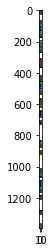

In [11]:
print(code_trace[::-1])
plt.imshow(np.vstack([spriteFromCode(x) for x in code_trace[::-1]]))

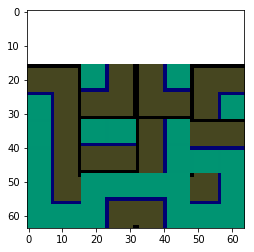

In [12]:
plt.imshow(np.hstack([np.vstack([spriteFromCode(x+y*4) for x in [0,1,2,3]]) for y in [0,1,2,3]]))

In [26]:
def possible(c,d):
    return np.where(rotRules(c//4)[c%4,d].flatten())[0].tolist()

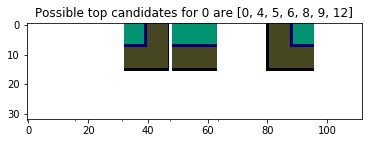

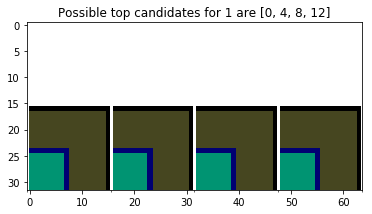

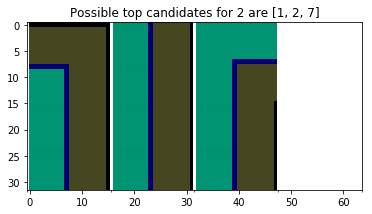

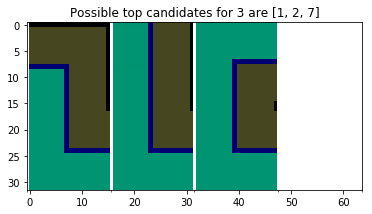

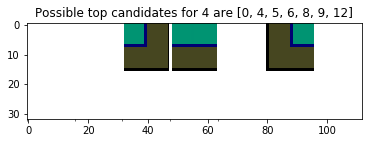

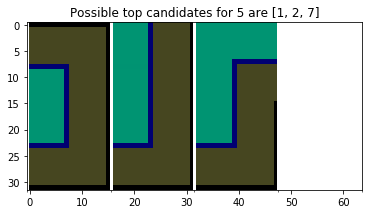

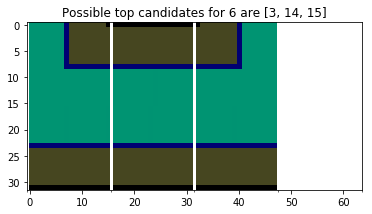

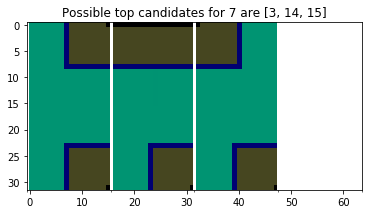

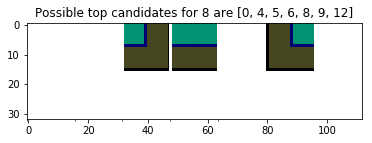

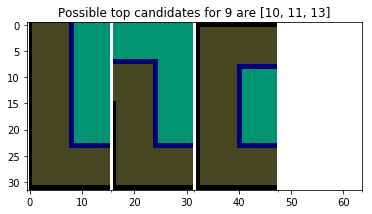

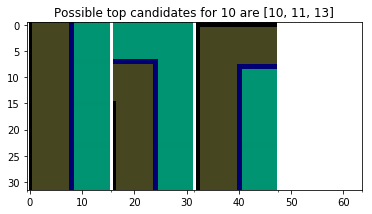

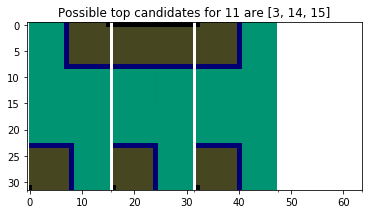

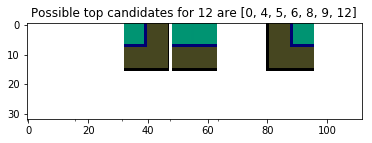

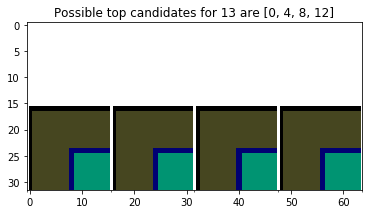

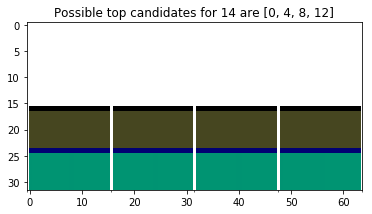

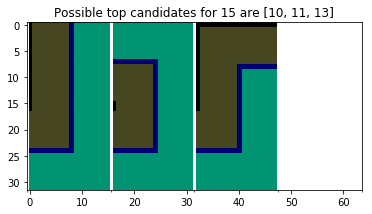

In [33]:
datatop = [np.vstack(
    [np.hstack([spriteFromCode(y) for y in possible(x,0)]), 
     np.hstack([spriteFromCode(x) for i in range(len(possible(x,0)))])]
) for x in range(16)]

for i in range(16):
    plt.figure()
    plt.imshow(datatop[i])
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, 64, 16), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=3)
    ax.set_title("Possible top candidates for " + str(i) + " are " + str(possible(i,0)))

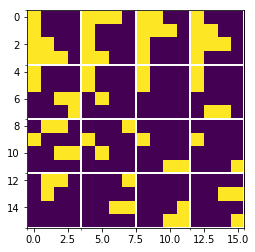

In [16]:
plt.imshow(np.resize(rules,(16,16)))
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 16, 4), minor=True)
ax.set_yticks(np.arange(-0.5, 16, 4), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

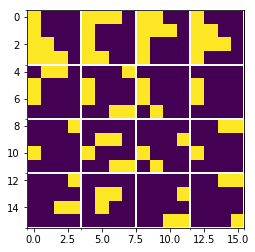

In [25]:
c=7
plt.imshow(np.resize(rotRules(c//4),(16,16)))
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 16, 4), minor=True);
ax.set_yticks(np.arange(-0.5, 16, 4), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

In [86]:
X = np.array([5,4,3,2,1,3,4,6,7,2,2,3])

In [26]:
for x in [(39, 0), (0, 1), (1, 0), (0, 39)]:
    print(x[0],x[1])

39 0
0 1
1 0
0 39


In [12]:
set([])

set()